# Libraries

In [1]:
# Basics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_style('darkgrid')

# Others
import openpyxl
import xlrd
import os
import io
import warnings
import statistics

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import (calculate_bartlett_sphericity,
                                             calculate_kmo,
                                             chi2)

In [2]:
# Metrics from Sklearn
from sklearn import metrics
from sklearn import set_config
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models Regression from Sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [3]:
# Regression
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)

In [5]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
set_config(display="text")  # displays text representation of estimators
plt.rcParams["figure.figsize"] = [7.2, 4.8]

# Input Dataset for Model

In [6]:
# Dados dos empregados com vinculo ativo em 31/12 apenas da industria da transformação do ano de 2021
df_ind_trans = pd.read_csv(r"DF_Industria_tranformacao_2021.csv", sep=";", encoding='UTF-8', low_memory=False)
df_ind_trans.shape

(1146857, 24)

In [7]:
df_ind_trans.head()

,id,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade_após_2005,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_2.0_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_
0,0,7,6,3,1,44,50,1,0,0,4,1372.730,1,4,7.300,2,0,0,0,2012.803,3363.495,2012.400,2455.315,2662.986
1,1,7,1,6,1,1,61,0,0,20,2,1340.190,1,7,37.600,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867
2,2,8,5,6,1,36,68,0,0,62,8,2263.800,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867
3,3,4,6,3,1,44,28,1,0,0,2,2083.360,1,3,6.100,2,0,0,0,2231.034,3363.495,1877.463,2210.861,1971.877
4,4,7,6,3,1,44,64,0,0,172,4,1417.420,1,6,9.600,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046


In [8]:
df_ind_trans = df_ind_trans.rename(columns={'Escolaridade_após_2005': 'Escolaridade', 'CNAE_2.0_Subclasse_targetencoder_': 'CNAE_Subclasse_targetencoder_'})

# Split Dataset into Train and Test

In [9]:
df_model = df_ind_trans.sample(frac = 0.5)
df_model.shape

(573428, 24)

In [10]:
df_seleted = df_model[['id']]
df_seleted['Select'] = 1
df_seleted.shape

C:\Users\luand\AppData\Local\Temp\ipykernel_22508\3788505534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleted['Select'] = 1


(573428, 2)

In [11]:
df_ind_trans = df_ind_trans.merge(df_seleted, on=['id'], how='left')
df_ind_trans['Select'] = df_ind_trans['Select'].fillna(0)
df_ind_trans.head()

,id,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_,Select
0,0,7,6,3,1,44,50,1,0,0,4,1372.730,1,4,7.300,2,0,0,0,2012.803,3363.495,2012.400,2455.315,2662.986,1.000
1,1,7,1,6,1,1,61,0,0,20,2,1340.190,1,7,37.600,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,0.000
2,2,8,5,6,1,36,68,0,0,62,8,2263.800,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,0.000
3,3,4,6,3,1,44,28,1,0,0,2,2083.360,1,3,6.100,2,0,0,0,2231.034,3363.495,1877.463,2210.861,1971.877,1.000
4,4,7,6,3,1,44,64,0,0,172,4,1417.420,1,6,9.600,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046,1.000


In [12]:
df_ind_trans['Select'].value_counts()

Select
0.000    573429
1.000    573428
Name: count, dtype: int64

# Making Dataset de Train and Test

In [28]:
df_train = df_ind_trans[(df_ind_trans['Select'] == 1)]
df_test = df_ind_trans[(df_ind_trans['Select'] == 0)]
df_train.shape, df_test.shape

((573428, 25), (573429, 25))

In [29]:
df_train = df_train.drop(columns=['Select'])
df_test = df_test.drop(columns=['Select'])
df_train = df_train.set_index(['id'])
df_test = df_test.set_index(['id'])
df_train.shape, df_test.shape

((573428, 23), (573429, 23))

# View of Correlation

<Axes: >

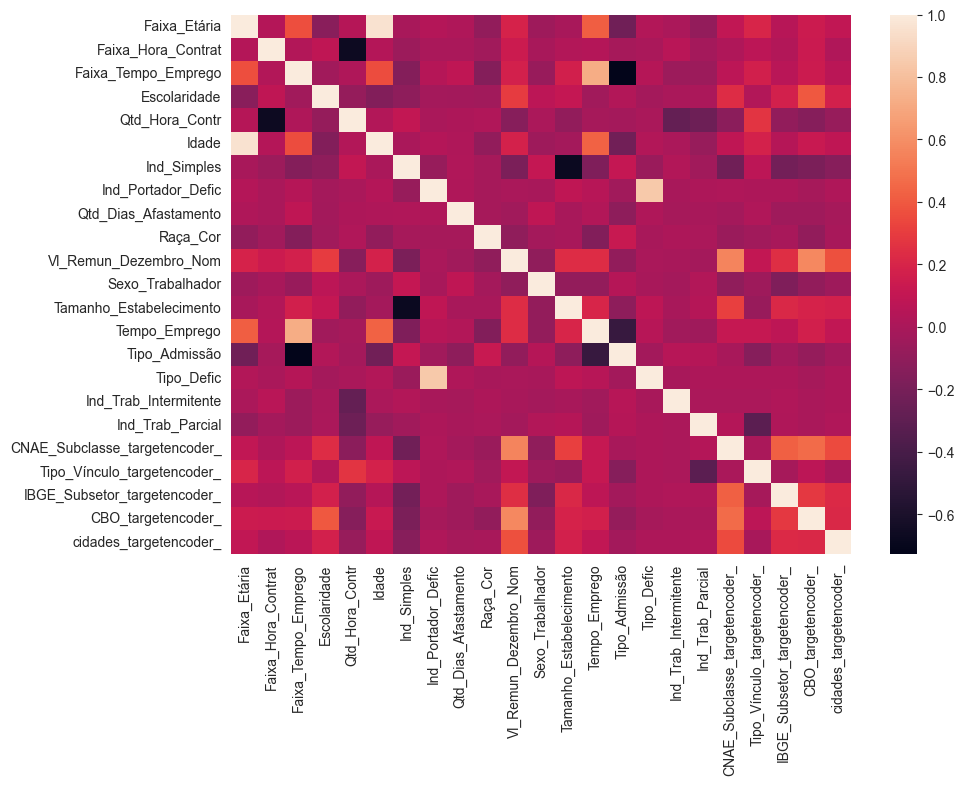

In [30]:
#plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.figsize"] = [10, 7]
cormat = df_train.corr()
#sns.heatmap(cormat, annot=True)
sns.heatmap(cormat)

# Separating the variables - first part

In [31]:
#feature scaling
sc = MinMaxScaler()
lst_column = df_train.columns.tolist()

for cols in lst_column: 
    df_train[cols] = sc.fit_transform(df_train[[cols]])

df_train.head()    

,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_
id,,,,,,,,,,,,,,,,,,,,,,,
0,0.857,0.051,0.020,0.000,1.000,0.429,1.000,0.000,0.000,0.031,0.006,0.000,0.250,0.012,0.333,0.000,0.000,0.000,0.027,0.187,0.064,0.053,0.046
3,0.429,0.051,0.020,0.000,1.000,0.167,1.000,0.000,0.000,0.010,0.011,0.000,0.125,0.010,0.333,0.000,0.000,0.000,0.037,0.187,0.030,0.040,0.006
4,0.857,0.051,0.020,0.000,1.000,0.595,0.000,0.000,0.471,0.031,0.007,0.000,0.500,0.016,0.333,0.000,0.000,0.000,0.084,0.187,0.685,0.007,0.053
5,0.571,0.051,0.020,0.000,1.000,0.238,1.000,0.000,0.000,0.010,0.005,0.000,0.125,0.020,0.167,0.000,0.000,0.000,0.003,0.187,0.150,0.007,0.025
6,0.714,0.051,0.031,0.000,1.000,0.417,1.000,0.000,0.000,0.071,0.005,0.000,0.000,0.032,0.000,0.000,0.000,0.000,0.052,0.187,0.150,0.018,0.059


In [32]:
X = df_train.drop(columns='Vl_Remun_Dezembro_Nom')
y = df_train['Vl_Remun_Dezembro_Nom']
X.shape, y.shape

((573428, 22), (573428,))

# Training the GLM

## Version 1

In [33]:
mod_1 = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log()))
res_1 = mod_1.fit()
display(res_1.summary())
# For the first question, you should look at the (P>|z|) column. If the absolute p-value is smaller than 0.05,
# it means that the feature affects Churn in a statistically significant way.

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Generalized Linear Model Regression Results                   
=================================================================================
Dep. Variable:     Vl_Remun_Dezembro_Nom   No. Observations:               573428
Model:                               GLM   Df Residuals:                   573406
Model Family:                    Poisson   Df Model:                           21
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -43793.
Date:                   Mon, 24 Jun 2024   Deviance:                       6271.7
Time:                           16:45:29   Pearson chi2:                 4.79e+04
No. Iterations:                        6   Pseudo R-squ. (CS):            0.01043
Covariance Type:               nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Faixa_Etária                     -2.0368      0.176    -11.595      0.000      -2.381      -1.693
Faixa_Hora_Contrat               -2.3511      0.079    -29.678      0.000      -2.506      -2.196
Faixa_Tempo_Emprego              -7.8581      0.928     -8.465      0.000      -9.677      -6.039
Escolaridade                     -0.0353      0.067     -0.529      0.597      -0.166       0.096
Qtd_Hora_Contr                   -3.0009      0.056    -53.976      0.000      -3.110      -2.892
Idade                             2.9117      0.239     12.180      0.000       2.443       3.380
Ind_Simples                      -0.6736      0.034    -19.640      0.000      -0.741      -0.606
Ind_Portador_Defic               -0.0683      0.144     -0.474      0.635      -0.350       0.214
Qtd_Dias_Afastamento             -0.5003      0.142     -3.514      0.000      -0.779      -0.221
Raça_Cor                         -4.6590      0.320    -14.559      0.000      -5.286      -4.032
Sexo_Trabalhador                 -0.3196      0.024    -13.165      0.000      -0.367      -0.272
Tamanho_Estabelecimento          -0.4097      0.042     -9.679      0.000      -0.493      -0.327
Tempo_Emprego                     1.2918      0.096     13.425      0.000       1.103       1.480
Tipo_Admissão                    -1.3422      0.102    -13.126      0.000      -1.543      -1.142
Tipo_Defic                       -0.1773      0.326     -0.544      0.586      -0.816       0.461
Ind_Trab_Intermitente            -2.3347      0.219    -10.670      0.000      -2.764      -1.906
Ind_Trab_Parcial                 -2.2541      0.187    -12.033      0.000      -2.621      -1.887
CNAE_Subclasse_targetencoder_     0.8657      0.053     16.451      0.000       0.763       0.969
Tipo_Vínculo_targetencoder_      -0.7708      0.217     -3.558      0.000      -1.195      -0.346
IBGE_Subsetor_targetencoder_     -0.0993      0.036     -2.778      0.005      -0.169      -0.029
CBO_targetencoder_                2.1616      0.064     33.714      0.000       2.036       2.287
cidades_targetencoder_            1.6531      0.061     26.984      0.000       1.533       1.773
=================================================================================================
"""

In [34]:
np.exp(res_1.params)

Faixa_Etária                     0.130
Faixa_Hora_Contrat               0.095
Faixa_Tempo_Emprego              0.000
Escolaridade                     0.965
Qtd_Hora_Contr                   0.050
Idade                           18.388
Ind_Simples                      0.510
Ind_Portador_Defic               0.934
Qtd_Dias_Afastamento             0.606
Raça_Cor                         0.009
Sexo_Trabalhador                 0.726
Tamanho_Estabelecimento          0.664
Tempo_Emprego                    3.639
Tipo_Admissão                    0.261
Tipo_Defic                       0.837
Ind_Trab_Intermitente            0.097
Ind_Trab_Parcial                 0.105
CNAE_Subclasse_targetencoder_    2.377
Tipo_Vínculo_targetencoder_      0.463
IBGE_Subsetor_targetencoder_     0.905
CBO_targetencoder_               8.685
cidades_targetencoder_           5.223
dtype: float64

In [35]:
random_ = 2023
X_train_res_1, X_test_res_1, y_train_res_1, y_test_res_1 = train_test_split(X , y, test_size=0.2, random_state=random_)
X_train_res_1.shape, X_test_res_1.shape, y_train_res_1.shape, y_test_res_1.shape

((458742, 22), (114686, 22), (458742,), (114686,))

In [36]:
y_pred_res_1= res_1.predict(X_test_res_1) 

In [37]:
res_1_diff = pd.DataFrame({'Actual value': y_test_res_1, 'Predicted value': y_pred_res_1})
res_1_diff.head(10)

,Actual value,Predicted value
id,,
757932,0.010,0.006
30856,0.016,0.012
1032383,0.024,0.020
694316,0.010,0.020
1139121,0.013,0.012
771282,0.005,0.004
191971,0.007,0.016
189323,0.011,0.020
901831,0.006,0.007


In [38]:
res_1_diff.describe()

,Actual value,Predicted value
count,114686.000,114686.000
mean,0.018,0.019
std,0.031,0.030
min,0.000,0.000
25%,0.007,0.009
50%,0.010,0.013
75%,0.017,0.019
max,1.000,1.159


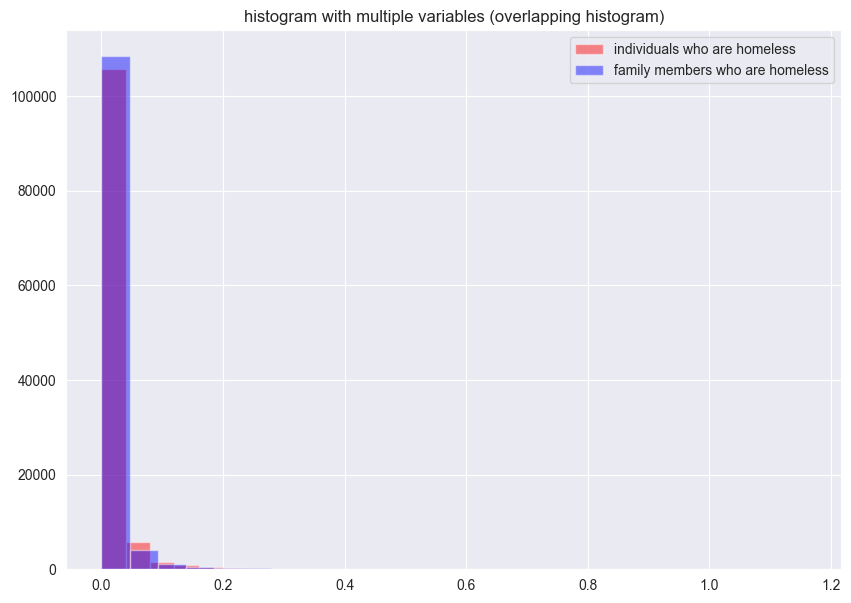

In [39]:
# plotting two histograms on the same axis 
plt.hist(res_1_diff['Actual value'], bins=25, alpha=0.45, color='red') 
plt.hist(res_1_diff['Predicted value'], bins=25, alpha=0.45, color='blue') 
plt.title("histogram with multiple variables (overlapping histogram)") 
plt.legend(['individuals who are homeless',  'family members who are homeless']) 
plt.show() 

In [40]:
mae_res_1 = metrics.mean_absolute_error(y_test_res_1, y_pred_res_1)
mse_res_1 = metrics.mean_squared_error(y_test_res_1, y_pred_res_1)
r2_res_1 = np.sqrt(metrics.mean_squared_error(y_test_res_1, y_pred_res_1))

print('Mean Absolute Error:', mae_res_1)
print('Mean Square Error:', mse_res_1)
print('Root Mean Square Error:', r2_res_1)

Mean Absolute Error: 0.010657720404968405
Mean Square Error: 0.0007964124514358949
Root Mean Square Error: 0.028220780489488503


## Version 2

In [41]:
mod_2 = sm.OLS(y, X)    # Describe model
res_2 = mod_2.fit()       # Fit model
print(res_2.summary())   # Summarize model

                                  OLS Regression Results                                  
Dep. Variable:     Vl_Remun_Dezembro_Nom   R-squared (uncentered):                   0.620
Model:                               OLS   Adj. R-squared (uncentered):              0.620
Method:                    Least Squares   F-statistic:                          4.248e+04
Date:                   Mon, 24 Jun 2024   Prob (F-statistic):                        0.00
Time:                           16:47:23   Log-Likelihood:                      1.3626e+06
No. Observations:                 573428   AIC:                                 -2.725e+06
Df Residuals:                     573406   BIC:                                 -2.725e+06
Df Model:                             22                                                  
Covariance Type:               nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025     

In [42]:
np.exp(res_2.params)
# The second question about feature importances can be answered by looking at the exponential coefficient values. 
# The exponential coefficient estimates the expected change in *Vl_Remun_Dezembro_Nom* through a given feature by a change of one unit.
# This outputs the odd ratios. Values more than 1 indicate increased *Vl_Remun_Dezembro_Nom*. Values less than 1 indicate that *Vl_Remun_Dezembro_Nom* is happening less.

Faixa_Etária                    0.991
Faixa_Hora_Contrat              1.008
Faixa_Tempo_Emprego             0.969
Escolaridade                    1.012
Qtd_Hora_Contr                  0.983
Idade                           1.026
Ind_Simples                     1.000
Ind_Portador_Defic              0.997
Qtd_Dias_Afastamento            0.995
Raça_Cor                        0.968
Sexo_Trabalhador                0.998
Tamanho_Estabelecimento         1.002
Tempo_Emprego                   1.027
Tipo_Admissão                   0.998
Tipo_Defic                      0.999
Ind_Trab_Intermitente           0.983
Ind_Trab_Parcial                0.985
CNAE_Subclasse_targetencoder_   1.088
Tipo_Vínculo_targetencoder_     1.049
IBGE_Subsetor_targetencoder_    0.994
CBO_targetencoder_              1.092
cidades_targetencoder_          1.054
dtype: float64

## Version 3

In [43]:
df_train.head()

,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_
id,,,,,,,,,,,,,,,,,,,,,,,
0,0.857,0.051,0.020,0.000,1.000,0.429,1.000,0.000,0.000,0.031,0.006,0.000,0.250,0.012,0.333,0.000,0.000,0.000,0.027,0.187,0.064,0.053,0.046
3,0.429,0.051,0.020,0.000,1.000,0.167,1.000,0.000,0.000,0.010,0.011,0.000,0.125,0.010,0.333,0.000,0.000,0.000,0.037,0.187,0.030,0.040,0.006
4,0.857,0.051,0.020,0.000,1.000,0.595,0.000,0.000,0.471,0.031,0.007,0.000,0.500,0.016,0.333,0.000,0.000,0.000,0.084,0.187,0.685,0.007,0.053
5,0.571,0.051,0.020,0.000,1.000,0.238,1.000,0.000,0.000,0.010,0.005,0.000,0.125,0.020,0.167,0.000,0.000,0.000,0.003,0.187,0.150,0.007,0.025
6,0.714,0.051,0.031,0.000,1.000,0.417,1.000,0.000,0.000,0.071,0.005,0.000,0.000,0.032,0.000,0.000,0.000,0.000,0.052,0.187,0.150,0.018,0.059


In [44]:
#Prepare it for the GLM formula
glm_columns = [e for e in df_train if e not in ['Vl_Remun_Dezembro_Nom']]
glm_columns = ' + '.join(map(str, glm_columns))
glm_columns

'Faixa_Etária + Faixa_Hora_Contrat + Faixa_Tempo_Emprego + Escolaridade + Qtd_Hora_Contr + Idade + Ind_Simples + Ind_Portador_Defic + Qtd_Dias_Afastamento + Raça_Cor + Sexo_Trabalhador + Tamanho_Estabelecimento + Tempo_Emprego + Tipo_Admissão + Tipo_Defic + Ind_Trab_Intermitente + Ind_Trab_Parcial + CNAE_Subclasse_targetencoder_ + Tipo_Vínculo_targetencoder_ + IBGE_Subsetor_targetencoder_ + CBO_targetencoder_ + cidades_targetencoder_'

In [45]:
#Fiting it to the Generalized Linear Model
mod_3 = smf.glm(formula=f'Vl_Remun_Dezembro_Nom ~ {glm_columns}', data = df_train, family=sm.families.Poisson())
res_3 = mod_3.fit()
print(res_3.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Vl_Remun_Dezembro_Nom   No. Observations:               573428
Model:                               GLM   Df Residuals:                   573405
Model Family:                    Poisson   Df Model:                           22
Link Function:                       Log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -42348.
Date:                   Mon, 24 Jun 2024   Deviance:                       3380.4
Time:                           16:47:43   Pearson chi2:                 4.38e+03
No. Iterations:                        6   Pseudo R-squ. (CS):            0.01541
Covariance Type:               nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

In [46]:
np.exp(res_3.params)

Intercept                       0.001
Faixa_Etária                    2.607
Faixa_Hora_Contrat              2.099
Faixa_Tempo_Emprego             6.798
Escolaridade                    4.474
Qtd_Hora_Contr                  1.319
Idade                           0.931
Ind_Simples                     0.802
Ind_Portador_Defic              0.874
Qtd_Dias_Afastamento            0.724
Raça_Cor                        0.242
Sexo_Trabalhador                0.789
Tamanho_Estabelecimento         1.413
Tempo_Emprego                   2.089
Tipo_Admissão                   0.987
Tipo_Defic                      0.932
Ind_Trab_Intermitente           1.012
Ind_Trab_Parcial                0.643
CNAE_Subclasse_targetencoder_   1.986
Tipo_Vínculo_targetencoder_     2.020
IBGE_Subsetor_targetencoder_    1.130
CBO_targetencoder_              5.539
cidades_targetencoder_          5.489
dtype: float64

## Model Building
### Splitting the dataset into train and test set

In [47]:
random_ = 2023
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=random_)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((458742, 22), (114686, 22), (458742,), (114686,))

In [48]:
reg_model = linear_model.LinearRegression()

#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [49]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  -0.02246919060594484


[('Faixa_Etária', -0.0025584565818354017),
 ('Faixa_Hora_Contrat', 0.02165544783839818),
 ('Faixa_Tempo_Emprego', -0.018035009395846773),
 ('Escolaridade', 0.01536855593593661),
 ('Qtd_Hora_Contr', -0.002400593882390587),
 ('Idade', 0.01794198634494466),
 ('Ind_Simples', 0.000508015216165631),
 ('Ind_Portador_Defic', -0.00295816655827089),
 ('Qtd_Dias_Afastamento', -0.004111431830228024),
 ('Raça_Cor', -0.026331874986686855),
 ('Sexo_Trabalhador', -0.0017928646825887157),
 ('Tamanho_Estabelecimento', 0.00383761339868961),
 ('Tempo_Emprego', 0.026144681373098826),
 ('Tipo_Admissão', 0.000730734536683889),
 ('Tipo_Defic', -0.001132575882646964),
 ('Ind_Trab_Intermitente', -0.00859435468550488),
 ('Ind_Trab_Parcial', -0.006849982096940894),
 ('CNAE_Subclasse_targetencoder_', 0.08420523459766444),
 ('Tipo_Vínculo_targetencoder_', 0.054423044727193934),
 ('IBGE_Subsetor_targetencoder_', -0.0058788011380470195),
 ('CBO_targetencoder_', 0.08631680369756908),
 ('cidades_targetencoder_', 0.0539

In [51]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train)

In [52]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [0.00185031 0.01039984 0.03892885 ... 0.00215622 0.00477815 0.00770428]


In [53]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff.head(10)

,Actual value,Predicted value
id,,
757932,0.010,0.002
30856,0.016,0.010
1032383,0.024,0.039
694316,0.010,0.031
1139121,0.013,0.021
771282,0.005,0.003
191971,0.007,0.010
189323,0.011,0.013
901831,0.006,-0.002


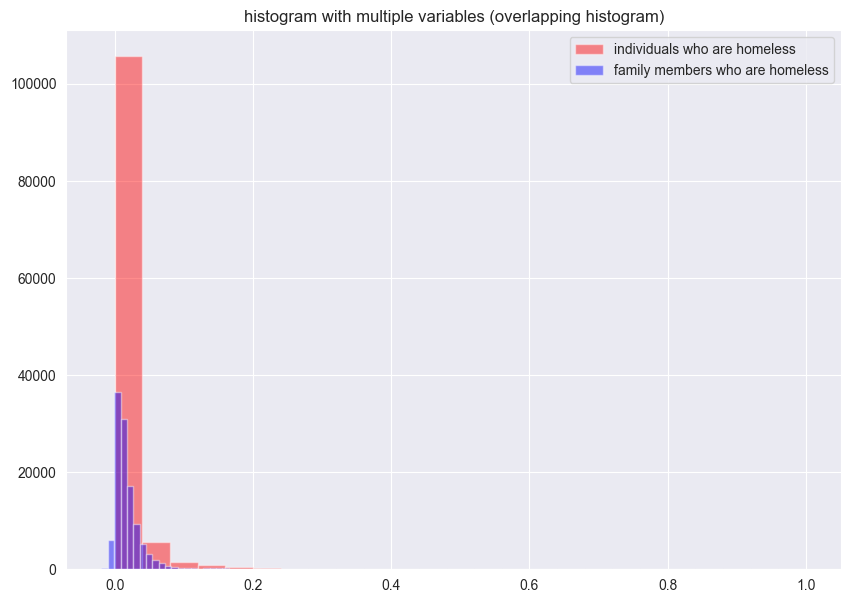

In [54]:
# plotting two histograms on the same axis 
plt.hist(reg_model_diff['Actual value'], bins=25, alpha=0.45, color='red') 
plt.hist(reg_model_diff['Predicted value'], bins=25, alpha=0.45, color='blue') 
plt.title("histogram with multiple variables (overlapping histogram)") 
plt.legend(['individuals who are homeless',  'family members who are homeless']) 
plt.show() 

In [55]:
reg_model_diff.describe()

,Actual value,Predicted value
count,114686.000,114686.000
mean,0.018,0.018
std,0.031,0.022
min,0.000,-0.019
25%,0.007,0.005
50%,0.010,0.012
75%,0.017,0.024
max,1.000,0.211


In [56]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.00962381388827726
Mean Square Error: 0.0004844931391427789
Root Mean Square Error: 0.022011204854409466
